# 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

In [1]:
# 載入套件
import numpy as np 
import tensorflow as tf 

## 定義訓練函數

In [2]:
# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [3]:
# 定義預測值函數
def predict(X):
    return w * X + b    

In [4]:
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0                                # 損失函數值
    for epoch in range(epochs):                   # 執行訓練週期
        with tf.GradientTape() as t:              # 自動微分
            t.watch(tf.constant(X))               # 宣告 TensorFlow 常數參與自動微分
            current_loss = loss(y, predict(X))    # 計算損失函數值
        
        dw, db = t.gradient(current_loss, [w, b]) # 取得 w, b 個別的梯度

        # 更新權重：新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        w.assign_sub(lr * dw) # w -= lr * dw
        b.assign_sub(lr * db) # b -= lr * db

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 

## 產生隨機資料

In [5]:
# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [6]:
X

array([ 5.18448297e+00,  8.76564625e+00,  1.07933199e+01,  3.97940147e+00,
        1.11510714e+01,  9.75770643e+00,  1.21460969e+01,  7.74126381e+00,
        1.22287372e+01, -1.18353064e+00,  8.73680056e+00, -2.58610053e-02,
        1.33610918e+01,  1.35906882e+01,  1.65300741e+01,  1.27473311e+01,
        1.34996967e+01,  1.61548995e+01,  1.88227627e+01,  7.28384526e-01,
        1.59515714e+01,  4.99718493e+00,  2.59828692e+00,  1.43697821e+01,
        1.07927360e+01,  9.29719327e+00,  1.04621461e+01,  4.99963147e+00,
        2.10630111e+01,  1.94095721e+01,  2.28365093e+01,  2.49240930e+01,
        1.79930513e+01,  7.22356271e+00,  2.29857998e+01,  2.68177448e+01,
        1.75570352e+01,  2.52781641e+01,  1.62401231e+01,  1.19565386e+01,
        2.19238356e+01,  1.83075991e+01,  2.89339225e+01,  1.51169448e+01,
        1.29088797e+01,  1.88125180e+01,  3.30178065e+01,  1.86083837e+01,
        2.90478471e+01,  2.62096802e+01,  2.86362096e+01,  2.73971226e+01,
        2.92242979e+01,  

In [7]:
y

array([-0.89344421,  8.60066848, -0.09513188,  3.05005829,  3.37279427,
       -5.40919349,  1.63858098, -1.01602883,  1.24104429,  8.69469787,
       -1.3263229 , 13.31249218,  6.35176579, 12.82879496, 13.32565664,
        6.37312577,  4.03746956, 15.71204368, 10.02666439,  5.3680424 ,
       19.19532114, 10.79832809, 10.13087698,  8.57853735,  2.21448342,
        4.62831476,  4.95167768,  5.61908264, 15.74594128, 23.18340517,
        8.84726802, 13.99858535, 23.34067991, 22.46843133,  9.89206757,
       27.46901568, 18.66823816, 18.05251323, 27.4555031 , 11.2708768 ,
       18.33686938, 29.66111115, 13.85944624, 18.73334174, 13.77494772,
       24.38173242, 14.26661685, 18.35824328, 31.89884036, 21.0417372 ,
       23.37760555, 24.0715208 , 21.06605528, 20.12860493, 30.0350868 ,
       26.33213195, 28.96600373, 38.68289429, 20.60261815, 34.55533169,
       21.77102642, 31.42392971, 40.93861366, 30.89709179, 26.53567309,
       32.71897201, 34.65830787, 38.50013596, 32.02097634, 25.21

## 執行訓練

In [8]:
# w、b 初始值均設為 0
w = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# w、b 的最佳解
print(f'w={w.numpy()}, b={b.numpy()}')

Epoch 0: Loss: 782.238525390625
Epoch 1: Loss: 547.88427734375
Epoch 2: Loss: 389.2410888671875
Epoch 3: Loss: 281.8495788574219
Epoch 4: Loss: 209.15219116210938
Epoch 5: Loss: 159.94058227539062
Epoch 6: Loss: 126.62741088867188
Epoch 7: Loss: 104.07646179199219
Epoch 8: Loss: 88.81088256835938
Epoch 9: Loss: 78.47702026367188
Epoch 10: Loss: 71.48165893554688
Epoch 11: Loss: 66.7462387084961
Epoch 12: Loss: 63.540653228759766
Epoch 13: Loss: 61.370662689208984
Epoch 14: Loss: 59.90171813964844
Epoch 15: Loss: 58.90733337402344
Epoch 16: Loss: 58.23419952392578
Epoch 17: Loss: 57.778526306152344
Epoch 18: Loss: 57.470054626464844
Epoch 19: Loss: 57.26124954223633
Epoch 20: Loss: 57.11989212036133
Epoch 21: Loss: 57.024208068847656
Epoch 22: Loss: 56.959434509277344
Epoch 23: Loss: 56.915584564208984
Epoch 24: Loss: 56.88591003417969
Epoch 25: Loss: 56.86581039428711
Epoch 26: Loss: 56.852210998535156
Epoch 27: Loss: 56.84299850463867
Epoch 28: Loss: 56.836769104003906
Epoch 29: Loss:

## 顯示迴歸線

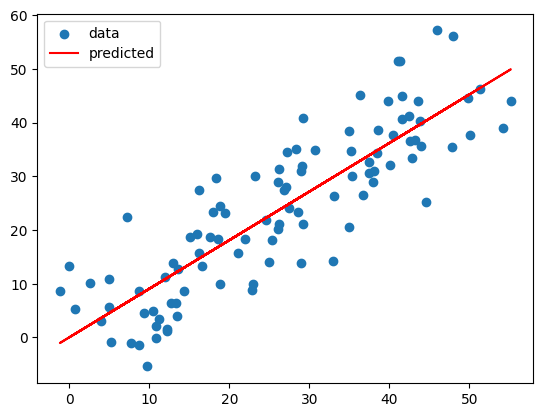

In [9]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend();